<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 5

## Q1: Distribution of power spectral estimates

<div style='background:#F0F0F0'>**1** You **may** use `matplotlib.mlab.psd` for the following question, but you had best use it correctly!

Using normally distributed random noise time series of length $N=2048$, show using a Monte Carlo analysis and by comparison to the theoretical probability distribution functions that:  
</div>

   1. The raw spectral estimate is indeed distributed as $\chi^2_2$.
   2. Show that block averaging with no overlap is distributed as $\chi^2_{2N_{blocks}}$.
   3. Show that block averaging with 50% overlap Hanning windows is distributed as $\chi^2_{2N_{blocks}}$.

<div style='background:#F0F0F0'>You can choose your block length, but making it an integer divisor of 2048 will make your life a lot easier.  Show that as $N_{blocks}$ is increased the variance drops (i.e. the distribution of the spectral estimates gets tighter).</div>


<div style='background:#F0F0F0'>HINT: for this time series the individual frequency estimates are indipendent samples of the distribution, so you can use them in compiling your distributions.</div>

<div style='background:#F0F0F0'>HINT: To get the pdf of the $\chi^2_\nu$ distribution correct, you need to "scale" by $\nu^{-1}$ where $\nu$ are the degrees of freedom.</div>

<div style='background:#F0F0F0'>HINT: for good presentation, make your histograms have the same bin sizes, and compare the distributions for all three cases on the same plot.</div>

In [1]:
import numpy.random as random
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.stats as stats
%matplotlib nbagg
%matplotlib inline

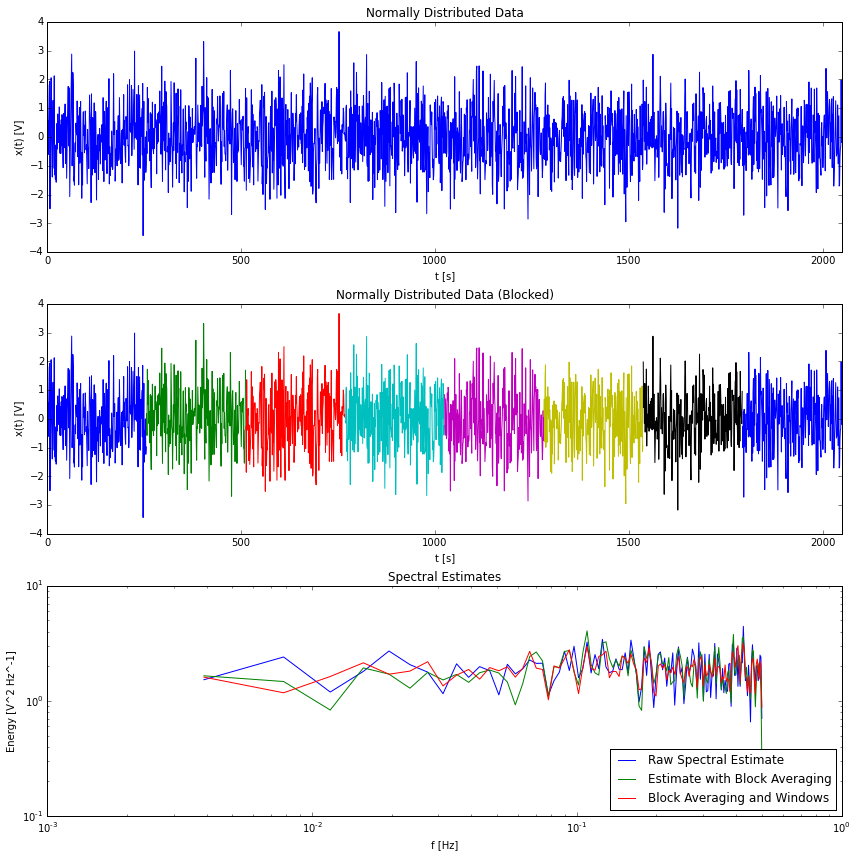

In [2]:
# Gather data
N = 2048
x = np.random.normal(0,1,N)
t = np.arange(N)
dt = 1 # hour
T = N*dt
nfft=256 # block length
Nblocks = N/nfft
blockSize = nfft

# Raw estimate 
rawEstimate,freqRaw = mlab.psd(x,NFFT=nfft,Fs=1./dt,window=mlab.window_none,noverlap=0)
dofRaw = 2.
# Block averaging with no overlap
blockNoOverlap,freqNoOverlap = mlab.psd(x,NFFT=nfft,Fs=1./dt,window=mlab.window_hanning,noverlap=0)
dofBlock = 2.*N/nfft
# Block averaging with 50% overlap Hanning windows
blockWindows,freqWindows = mlab.psd(x,NFFT=nfft,Fs=1./dt,window=mlab.window_hanning,noverlap=nfft/2)
dofOverlap = 2.*N/(nfft*2-1)

# Graph the data before putting it in histograms
plt.figure(figsize=(12,12))
gs=gridspec.GridSpec(3,1)

# graph normal data
ax1=plt.subplot(gs[0:1])
ax1.plot(t,x,label='x(t)')
ax1.set_xlabel('t [s]')
ax1.set_ylabel('x(t) [V]')
ax1.set_title('Normally Distributed Data')
ax1.set_xlim(right=t[-1])

# graph blocked data
ax2=plt.subplot(gs[1:2])
for ind in range(Nblocks):
    inds =range(ind*blockSize,(ind+1)*blockSize)
    tblock=t[inds]
    xblock=x[inds]
    #print len(xblock)
    ax2.plot(tblock,xblock)
ax2.set_xlabel('t [s]')
ax2.set_ylabel('x(t) [V]')
ax2.set_title('Normally Distributed Data (Blocked)')
ax2.set_xlim(right=t[-1])

# graph spectral estimates
ax3=plt.subplot(gs[2:3])
ax3.plot(freqRaw,rawEstimate,label='Raw Spectral Estimate')
ax3.plot(freqNoOverlap,blockNoOverlap,label='Estimate with Block Averaging')
ax3.plot(freqWindows,blockWindows,label='Block Averaging and Windows')
ax3.set_xlabel('f [Hz]')
ax3.set_ylabel('Energy [V^2 Hz^-1]')
ax3.set_title('Spectral Estimates')
ax3.legend(loc=4)
ax3.loglog()

plt.tight_layout()

n 1025
101
101


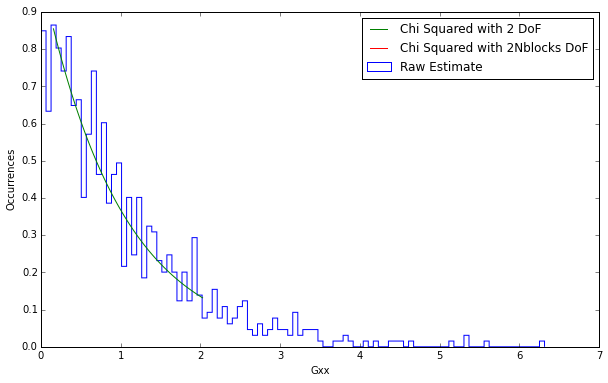

In [8]:
# Run the Monte Carlo analysis
N = 2048
Nexps = 1000
numFreqs = len(freqRaw)
GridRaw = np.ndarray((Nexps,N/2+1))
GridBlock = np.ndarray((Nexps,129))
GridOverlap = np.ndarray((Nexps,129))

print 'n',numFreqs

for i in range(Nexps):
    # Raw estimate 
    rawEstimate,freqRaw = mlab.psd(x,NFFT=N,Fs=1./dt,window=mlab.window_none,noverlap=0)
    GridRaw[i,:] = rawEstimate
    # Block averaging with no overlap
    blockNoOverlap,freqNoOverlap = mlab.psd(x,NFFT=nfft,Fs=1./dt,window=mlab.window_hanning,noverlap=0)
    #print 'f',len(freqNoOverlap)
    GridBlock[i,:] = blockNoOverlap
    # Block averaging with 50% overlap Hanning windows
    blockWindows,freqWindows = mlab.psd(x,NFFT=nfft,Fs=1./dt,window=mlab.window_hanning,noverlap=256/2)
    GridOverlap[i,:] = blockWindows

# Scale and flatten the data
GridRaw = GridRaw/2.
rawEstimate = GridRaw.flat
GridBlock = GridBlock/2.
blockEstimate = GridBlock.flat
GridOverlap = GridOverlap/2.
overlapEstimate = GridOverlap.flat

# Plot Histograms Together
bins = 100

plt.figure(figsize=(10,6))
gs=gridspec.GridSpec(1,1)
ax=plt.subplot(gs[0:1])
ax.hist(rawEstimate,bins,label='Raw Estimate',histtype='step',normed=True)
#nn,binsA,patches = ax.hist(blockEstimate,bins,label='Block Averaging',histtype='step',normed=True)
#nn,binsB,patches = ax.hist(overlapEstimate,bins,label='Windowed Averaging',histtype='step',normed=True)

# Theoretical PDF's
#x = np.linspace(0,8,1000)
chiSquared2 = stats.chi2.pdf(binsA,2,scale=1./2.)
chiSquared2N = stats.chi2.pdf(binsB,2*Nblocks,scale=1.*N/nfft)

# Plot theoretical PDF's
ax.plot(binsA,chiSquared2,label='Chi Squared with 2 DoF')
ax.plot(binsB,chiSquared2N,label='Chi Squared with 2Nblocks DoF')

print len(binsA)
print len(binsB)

ax.set_xlabel('Gxx')
ax.set_ylabel('Occurrences')
ax.legend()
#ax.set_xlim(left=0,right=8)

YOUR ANSWER HERE

<div style='background:#F0F0F0'>**2**  For the Hanning window estimate, what fits better: $2N_{blocks}$ degrees of freedom or $18N_{blocks}/11$ degrees of freedom (the correct theoretical value)?  Its OK to evaluate by eye.</div>

In [ ]:
# Theoretical PDF's
chiSquared2N = stats.chi2.pdf(binsA,df=2.*N/nfft,scale=1./2.)
chiSquared18N11 = stats.chi2.pdf(binsB,df=18.*N/nfft/11.,scale=1.*N/2./nfft)


# Plot it
plt.figure(figsize=(10,6))
gs=gridspec.GridSpec(1,1)
ax=plt.subplot(gs[0:1])
ax.hist(windowNorm,bins,label='Hanning Window Estimate',histtype='step',normed=True)
ax.hist(chiSquared2NNorm,bins,label='Chi Squared with 2Nblocks DoF',histtype='step',normed=True)
ax.hist(chiSquared18N11Norm,bins,label='Chi Squared with 18Nblocks/11 DoF',histtype='step',normed=True)
ax.legend()

YOUR ANSWER HERE

## Q2: Spectra of a "red-noise" signal

<div style='background:#F0F0F0'> **1** Load in the Deep Cove hourly data, and compute the power spectra using some reasonable value for $N_{FFT}$, and comment on the effect of applying the Hanning window to not applying it to the spectral leakage.</div>

In [ ]:
hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc = hourdata[0,:]
dc=dc[np.isfinite(dc)]

In [ ]:
t = np.arange(len(dc))
N = len(dc)
dt = 60*60*24*365.25 # year
T = dt * N

# Raw Spectra
DC = dt*np.fft.fft(dc)
GxxDC= (2./T)*np.real(np.conj(DC[:N/2])*DC[:N/2])
freqGxxDC = np.fft.fftfreq(len(GxxDC),1.)

# Block averaging with 25% overlap Hanning windows
nfft = 512
nop = nfft/4
windowsDC,freqWindowsDC = mlab.psd(dc,NFFT=nfft,Fs=1./dt,window=mlab.window_hanning,noverlap=nop)

# Normalize the data
GxxNorm = (GxxDC-np.mean(GxxDC))/np.std(GxxDC)
windowsNorm = (windowsDC-np.mean(windowsDC))/np.std(windowsDC)

plt.figure(figsize=(10,6))
gs=gridspec.GridSpec(1,1)
ax=plt.subplot(gs[0:1])
ax.plot(freqGxxDC,GxxNorm,label='No Windows')
ax.plot(freqWindowsDC,windowsNorm,label='Windows')
ax.set_title('Spectral Energies')
ax.set_xlabel('f [1/2piYears]')
ax.set_ylabel('Gxx(f)')
ax.legend()

plt.tight_layout()

<div style='background:#F0F0F0'> **2** Now do the same thing to the intergal of the Deep Cove data with time: $$y(t)=\int_o^t x(t')\ \mathrm{d}t'$$  This is obviously a silly thing to do, but compare the spectra and comment on the difference between the Hanning window and the non-Hanning windowed data.  </div>

In [ ]:
y = np.cumsum(dc)

# Raw Spectra
Y = dt*np.fft.fft(y)
GxxY= (2./T)*np.real(np.conj(Y[:N/2])*Y[:N/2])
freqGxxY = np.fft.fftfreq(len(GxxY),1.)

# Block averaging with 25% overlap Hanning windows
nfft = 512
nop = nfft/4
windowsY,freqWindowsY = mlab.psd(dc,NFFT=nfft,Fs=1./dt,window=mlab.window_hanning,noverlap=nop)

# Normalize the data
GxxNorm = (GxxY-np.mean(GxxY))/np.std(GxxY)
windowsNorm = (windowsY-np.mean(windowsY))/np.std(windowsY)

plt.figure(figsize=(12,10))
gs=gridspec.GridSpec(2,2)
ax1=plt.subplot(gs[0:1])
ax1.plot(t,dc)
ax1.set_title('Deep Cove Data')
ax1.set_xlabel('t [hours]')
ax1.set_ylabel('Temperature [Deg. Celcius]')

ax2=plt.subplot(gs[1:2])
ax2.plot(t,y)
ax2.set_title('Integral of Deep Cove Data with time')
ax2.set_xlabel('t [hours]')
ax2.set_ylabel('Integral')

ax3=plt.subplot(gs[2:4])
ax3.plot(freqGxxY,GxxY,label='No Windowing')
ax3.plot(freqWindowsY,windowsY,label='With Windowing')
ax3.set_title('Spectral Energies')
ax3.set_xlabel('f [1/2piYears]')
ax3.set_ylabel('Gxx(f)')
ax3.legend()

plt.tight_layout()

YOUR ANSWER HERE